# Pruebas con las funciones

In [1]:
def batch_gradient_descent(X, Y, eta, epochs, percent):
    '''Esta funcion se utiliza para implimentar el método de regresión lineal Batch Gradiente Descent
    batch_gradient_descent(X, Y, eta, epocs) where:
    X: DataFrame de instancias o features
    Y: DataFrame de targets
    eta: tasa de aprendizaje (learning rate)
    epocs: numero máximo de iteraciones
    percent: % de datos que seran utilizados para el test (base 100)
    
    ------------------------------------
    Return:
    In order: theta, test_index, train_index, Y_predict, J_log
    
    theta: valores correspondientes a theta_n
    test_index: data test index
    train_index: data training index
    Y_predict: Y predict values
    J_log: errores por numero de epoca
    '''
    import numpy as np
    import pandas as pd
    import random as random
    
    m = len(X)
    test_index = list(pd.Series(random.sample(list(np.arange(0, m)), round(m * percent / 100))).sort_values())
    train_index = list(np.arange(0, m))
    
    for element in test_index:
        train_index.remove(element)
        
    
    X_train = np.c_[X.iloc[train_index]]
    X_test = np.c_[X.iloc[test_index]]
    Y_train = np.c_[Y.iloc[train_index]]
    Y_test = np.c_[Y.iloc[test_index]]
    
    # Entrenamiento
    
    theta = np.random.randn((X.shape[1] + 1), 1)
    
    J_log = np.zeros(epochs)
    
    m = len(X_train)
    
    X_b = np.c_[np.ones((m, 1)), X_train]

    for i in range(epochs):
        J_log[i] = (2 / m) * ((X_b@theta - Y_train)**2).sum()
        gradients = (1 / m) * (X_b.T @ (X_b @ theta - Y_train)) 
        theta = theta - eta * gradients
    
    # Test
    
    m = len(X_test)
    
    X_b_test = np.c_[np.ones((m, 1)), X_test]
    Y_predict = X_b_test @ theta
    
    return theta, test_index, train_index, Y_predict, J_log

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [3]:
df = pd.read_csv('datos/insurance.csv')
genero = pd.get_dummies(df['sex'])
fumadores = pd.get_dummies(df['smoker'])
region = pd.get_dummies(df['region'])
df = pd.concat([df, genero['male'], fumadores['yes'], region], axis=1)
df = df.drop(['sex', 'smoker', 'region'], axis=1)
df = df.rename(columns={'male':'sex', 'yes':'smoker'})

In [14]:
X = df[['age', 'bmi', 'smoker']]
Y = df[['charges']]

In [12]:
X

,age,bmi,smoker
0,19,27.900,1
1,18,33.770,0
2,28,33.000,0
3,33,22.705,0
4,32,28.880,0
...,...,...,...
1333,50,30.970,0
1334,18,31.920,0
1335,18,36.850,0
1336,21,25.800,0


In [17]:
# Indices
m = len(X)
percent = 20
test_index = list(pd.Series(random.sample(list(np.arange(0, m)), round(m * percent / 100))).sort_values())
train_index = list(np.arange(0, m))
    
for element in test_index:
    train_index.remove(element)

In [18]:
X_train = np.c_[X.iloc[train_index]]
X_test = np.c_[X.iloc[test_index]]
Y_train = np.c_[Y.iloc[train_index]]
Y_test = np.c_[Y.iloc[test_index]]

In [44]:
epochs = 1000
eta = 0.00005
theta = np.random.randn((X.shape[1] + 1), 1)

J_log = np.zeros(epochs)

m = len(X_train)

X_b = np.c_[np.ones((m, 1)), X_train]

for i in range(epochs):
    J_log[i] = (2 / m) * ((X_b@theta - Y_train)**2).sum()
    gradients = (1 / m) * (X_b.T @ (X_b @ theta - Y_train)) 
    theta = theta - eta * gradients

In [46]:
m = len(X_test)

X_b_test = np.c_[np.ones((m, 1)), X_test]
Y_predict = X_b_test @ theta

# return theta, test_index, train_index, Y_predict, J_log

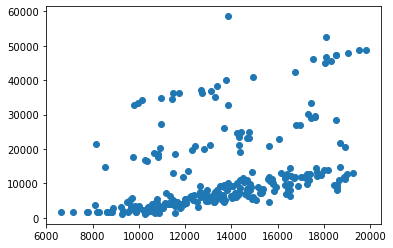

In [47]:
plt.scatter(Y_predict, Y_test)
plt.show()

In [48]:
theta, test_index, train_index, Y_predict, J_log = batch_gradient_descent(X, Y, eta, epochs, percent)

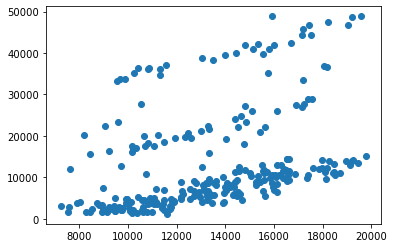

In [52]:
plt.scatter(Y_predict, Y.iloc[test_index])
plt.show()